In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
!pip install lasio
import lasio

In [14]:
import glob
import os

# get all paths and alphabetically ordered
paths = sorted(glob.glob(os.path.join("/content/sample_data", "*.LAS")))

well_df = [0] * 5

for i in range(len(paths)):
  # read with lasio
  well = lasio.read(paths[i])

  # convert to dataframe
  df = well.df()

  # in this dataframe, depth is positioned as index, not as column
  # so better to change depth index to column
  well_df[i] = df.reset_index()

well1, well2, well3, well4, well5 = well_df

In [24]:
well1

,DEPTH,BS,BVW,CARB_FLAG,COAL_FLAG,DELTA,GRMAX,GRMIN,J,KLHC_INT,KLOGH,M,N,PERF_FLAG,PHIF,PORD,RHOFL,RHOMA,RW,SAND_FLAG,SW,SWIRR,TEMP,VSH
0,3666.5916,8.5,0.111705,0.0,0.0,0.1475,115.0,14.0,0.000163,0.0003,0.0003,1.79,2.45,NaN,0.199843,0.199843,0.8,2.66,0.021643,0.0,0.5590,1.8023,112.7249,0.598800
1,3666.7440,8.5,0.112236,0.0,0.0,0.3583,115.0,14.0,0.000003,0.0000,0.0000,1.79,2.45,NaN,0.218743,0.218743,0.8,2.66,0.021642,0.0,0.5131,7.9467,112.7285,0.599555
2,3666.8964,8.5,0.114825,0.0,0.0,0.1298,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.242380,0.242380,0.8,2.66,0.021642,0.0,0.4737,6.5907,112.7321,0.600310
3,3667.0488,8.5,0.114419,0.0,0.0,0.2489,115.0,14.0,0.000002,0.0000,0.0000,1.79,2.45,NaN,0.226408,0.226408,0.8,2.66,0.021641,0.0,0.5054,8.6274,112.7358,0.601065
4,3667.2012,8.5,0.115867,0.0,0.0,0.2072,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.216169,0.216169,0.8,2.66,0.021640,0.0,0.5360,6.8473,112.7394,0.601820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,4124.2488,8.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.422817
3004,4124.4012,8.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.422817
3005,4124.5536,8.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.422817
3006,4124.7060,8.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.422817


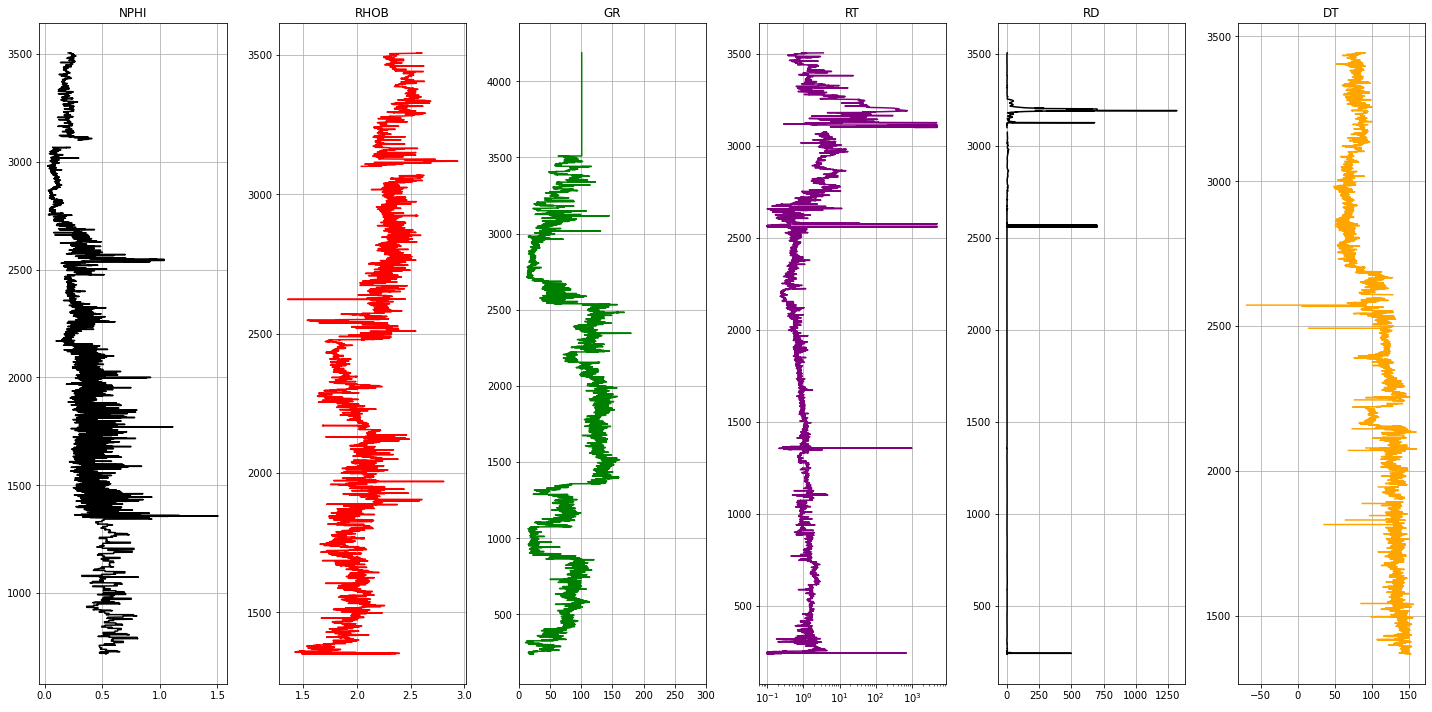

In [11]:
# Display train well data
well = well1 # train wells: well1, well3, well4

# define what logs are we going to us
logs = ['NPHI', 'RHOB', 'GR', 'RT', 'RD', 'DT']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['black', 'red', 'green', 'purple', 'black', 'orange']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_title(logs[i])
  ax[i].grid(True)

ax[2].set_xlim(0, 300)
plt.tight_layout(1.1)
plt.show()

In [13]:
well3

0